# Machine learning para prever se uma pessoa tem um bom ou mau risco de crédito

# Introdução 

Nos dias atuais,tecnologia e finanças vem andando cada vez mais juntos,com inúmeras aplicações da tecnologia em instituições financeiras . Uma das aplicações que se destaca ,em especial em bancos e instituições financeiras , é  o credit score,que tem como objetivo determinar se uma pessoas possui ou não perfil para adquirir crédito . Para construir o credit score,é utilizado desde técnicas de Machine Learning à Análise Estatística . Neste projeto,será construido modelos de Machine Learning para verificar se uma pessoa possui um "bom" ou "mal" risco de crédito,sendo que o conjunto de dados utilizado será "german_credit_data.csv",que contém informações de empréstimo de um banco alemão . Pode-se então conhecer de uma maneira mais completa esse conjunto de dados . 


# Dicionário dos dados 

**Age**=Idade do solicitante do empréstimo 

**Sex** = Sexo do solicitante do empréstimo,(Variável Categórica - Nos níveis "Male"(Masculino) e "female"(Feminino)

**Job** = Tipo de emprego que o solicitante possui,(Variável Categórica - Nos níveis  "0 - unskilled(Não qualificado) e non-resident(Não residente)","1 - unskilled(Qualificado) and resident(Residente)"," 2 - skilled(Especializada)"," 3 - highly skilled(Altamente especializada)")

**Housing** = Tipo de casa em que o solicitante mora ,(Variável Categórica - nos níveis own (Própria), rent(Aluguel), or free(Gratuita))

**Saving accounts** = Contas salvas(Variável Cetegórica - little(Pequena), moderate(Moderada), quite rich(Muito rico), rich(Rico))

**Checking account** = Conta corrente do solicitante 

**Credit amount** = Quantidade de crédito 

**Duration**= Duração do empréstimo em meses

**Purpose** = Propóposito do empréstimo (Variável Categórica - car(Carro),furniture/equipment(Móveis/Equipamentos), r
adio/TV, domestic appliances(Eletrodomésticos), repairs(Reparos), education(Educação), business(Negócios), vacation/others(Férias))

Pode-se observar as colunas que o banco de dados contém observando as 5 primeiras linhas,e também o número de colunas e linhas que o banco de dados possui : 

In [1]:
#Importação das bibliotecas a serem utilizadas 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
dados=pd.read_csv("german_credit_data.csv")
dados.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [2]:
dados.shape

(1000, 11)

Pode-se observar que o banco de dados é composto por 1000 linhas,e 11 colunas . Porém ,  a coluna "Unnamed: 0" não é significante para a análise, pois ela contém o id da observação, logo não traz nenhuma informação relevante,podendo ser retirada dos dados . 

# Pré processamento dos dados e limpeza dos dados 

In [3]:
dados.drop(columns=["Unnamed: 0"],inplace=True)

Agora, pode-se conhecer em que tipo o Pandas trata cada variável do conjunto de dados,e verificar se o tratamento está adequado : 

In [4]:
dados.dtypes 

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

É possivel concluir que o tratamento dado a cada variável está correto . Outro fator relevante antes de fazer uma análise estatistica é verificar se o conjunto de dados contém valores ausentes : 

In [5]:
dados.isnull().sum()/len(dados)*100

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64

É possivel verificar que a variável "Saving accounts" é composta de 18.3% das observações de  valores ausentes ,enquanto que a variável "Checking Account" possui 39.4%  . Logo,pode-se observar quais os valores mais frequentes nessas colunas,e então tomar uma decisão para substituir os valores ausentes , tal como, substituir pelo valor mais frequente, remover linhas que contém Na, etc . Sendo que a decisão a ser tomada deve ser analisada caso a caso . 

In [6]:
dados["Saving accounts"].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [7]:
dados["Checking account"].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

Para a coluna "Checking account" foi obtido que existe um equilibrio entre a resposta "litte" e "moderate",logo não há um valor que diferencia dos demais , logo uma estratégia que pode ser utilizada para os valores ausentes é  tratar as observações ausentes da coluna como um nível de resposta,e substitui-los pelo valor "Não Informado" . Enquanto que na variável "Saving accounts" cerca de 60% das observações são little , logo uma possível estratégia é substituir os valores ausentes dessa coluna por "little" .

In [8]:
dados["Saving accounts"].fillna("little",inplace=True)
dados["Checking account"].fillna("Não informado",inplace=True)

# Análise exploratória

Após tratar os valores ausentes, é interessante conhecer quantas observações possuem risco alto e risco baixo a partir de um gráfico  : 

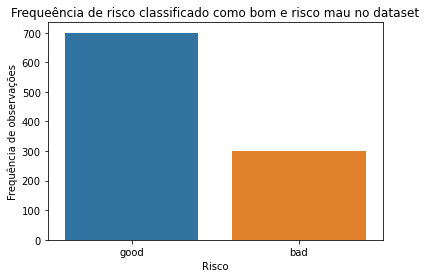

In [9]:
sns.countplot(dados["Risk"])
plt.title("Frequeência de risco classificado como bom e risco mau no dataset")
plt.xlabel("Risco")
plt.ylabel("Frequência de observações")
plt.show()

Ao se analisar o gráfico, pode-se observar que o número de observações que possui um risco considerado bom é de 70%  das observações, o que indica que a maior parte dos pagadores tem um bom nível de chance de pagar o crédito . Pode-se então conhecer as medidas sumárias , e as distribuição dos dados das variáveis quantitativas do Dataset  : 

In [10]:
dados[["Age","Credit amount","Duration"]].describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


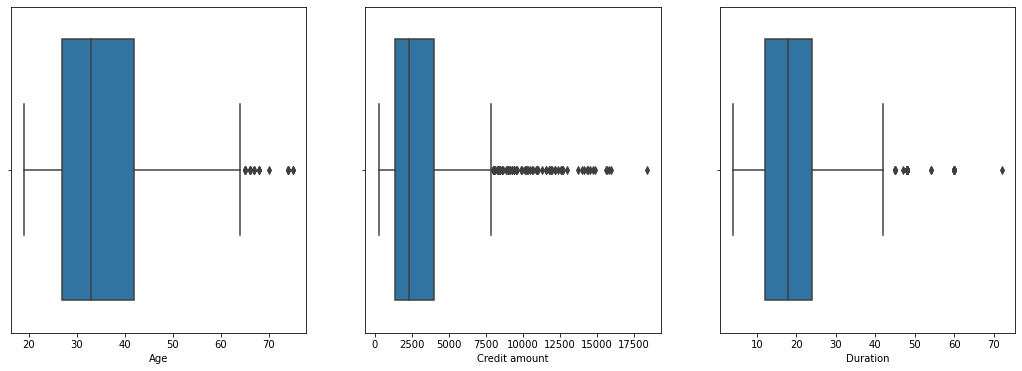

In [11]:
fig,(axis1,axis2,axis3)=plt.subplots(1,3,figsize=(18,6))
sns.boxplot(dados["Age"],ax=axis1)
sns.boxplot(dados["Credit amount"],ax=axis2)
sns.boxplot(dados["Duration"],ax=axis3)

C:\Users\j2184\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\j2184\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\j2184\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\j2184\anaconda3\lib\site-packages\pandas\plotting\_matpl

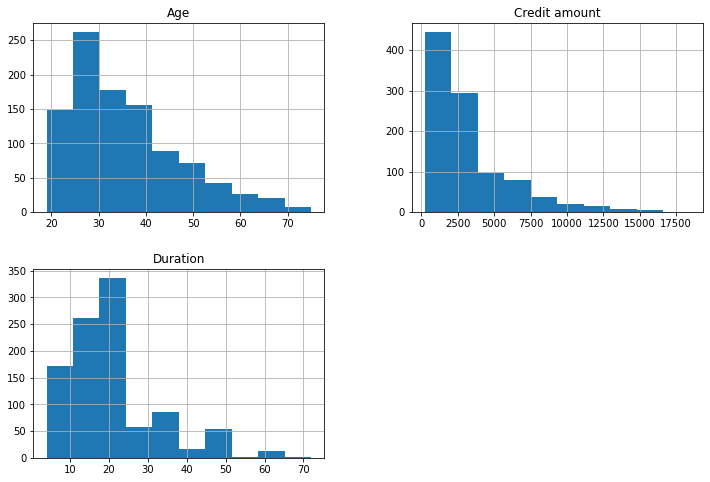

In [12]:
variaveisquantitativas=dados[["Age","Credit amount","Duration"]]
variaveisquantitativas.hist(figsize=(12,8));
plt.show()

Das distribuições,pode-se notar que nenhuma variável quantitativa aparenta possuir uma distribuição normal . Enquanto que do boxplot é possível observar que há algumas observações outlier nas três variáveis quantitativas, porém como os valores são possíveis,isto é,não existe,por exemplo,idade maior do 200 , pode-se deixar esses valores outliers no conjunto de dados . 

Então,pode-se conhecer a média dessas variáveis quantitativas de acordo com o risco de crédito . 

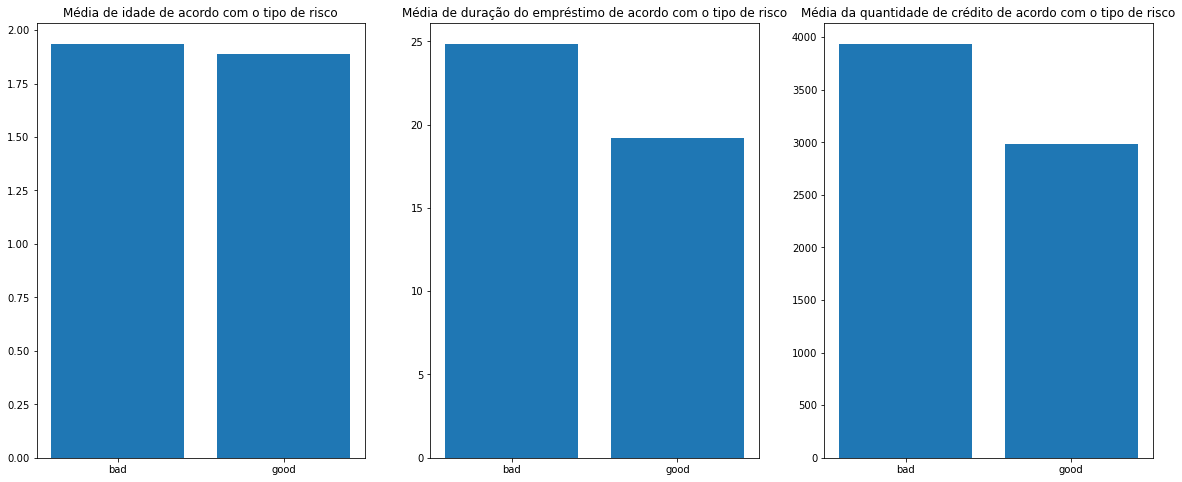

In [13]:
fig,(axis1,axis2,axis3)=plt.subplots(1,3,figsize=(20,8))
axis1.bar(dados.groupby("Risk")["Age"].mean().index,dados.groupby("Risk")["Job"].mean().values)
axis1.set_title("Média de idade de acordo com o tipo de risco")
axis2.bar(dados.groupby("Risk")["Duration"].mean().index,dados.groupby("Risk")["Duration"].mean().values)
axis2.set_title("Média de duração do empréstimo de acordo com o tipo de risco")
axis3.bar(dados.groupby("Risk")["Credit amount"].mean().index,dados.groupby("Risk")["Credit amount"].mean().values)
axis3.set_title("Média da quantidade de crédito de acordo com o tipo de risco")
plt.show()


Aparentemente , não há uma relação considerável entre o Risco associado e a variável referente a idade . Porém, para as variáveis relacionadas a duração do empréstimo,e quantidade de crédito existe uma diferença , pois a média dessas variáveis aparenta ser maior quando o tipo de crédito é ruim . Logo,pode-se interpretar da seguinte forma , quando o risco é ruim o tempo de duração do empréstimo costumava ser mais alto do que quando o risco é baixo . Já para a variável Credit Amount ,quando o risco é baixo, a quantidade de crédito solicitada é maior em média do que quando o risco é bom . 

Então,é possível conhecer as porcentagens de pessoas que pessoas que tem histórico bom de acordo com as variáveis qualitativas "Sex","Housing","Checking account","Saving accounts" através de um gráfico . 

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
labelencoder=LabelEncoder()
dados.iloc[:,9]=labelencoder.fit_transform(dados.iloc[:,9])


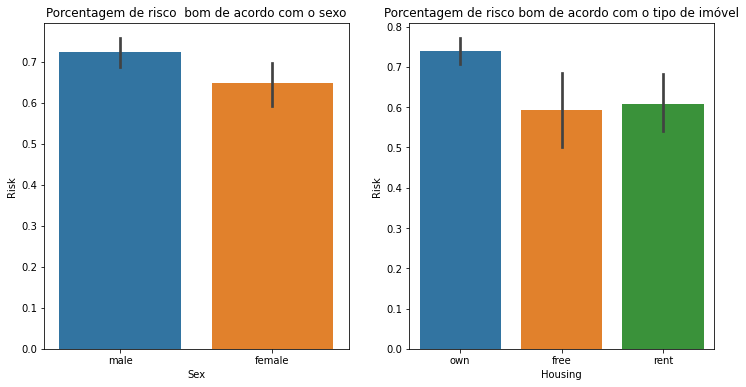

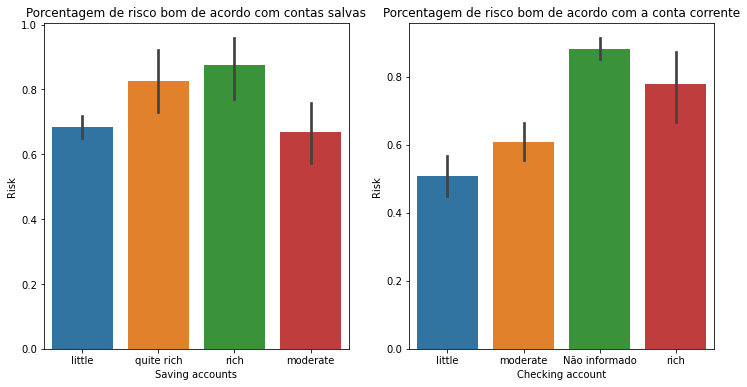

In [16]:
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(12,6))
sns.barplot(dados["Sex"],y=dados["Risk"],ax=axis1).set_title("Porcentagem de risco  bom de acordo com o sexo")
sns.barplot(x=dados["Housing"],y=dados["Risk"],ax=axis2).set_title("Porcentagem de risco bom de acordo com o tipo de imóvel")
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(12,6))
sns.barplot(x=dados["Saving accounts"],y=dados["Risk"],ax=axis1).set_title("Porcentagem de risco bom de acordo com contas salvas")
sns.barplot(dados["Checking account"],y=dados["Risk"],ax=axis2).set_title("Porcentagem de risco bom de acordo com a conta corrente")
plt.show()


Ao observar o gráfico de risco dado por sexo,é possivel concluir que pessoas do sexo masculino aparentam possuir um histórico de crédito levemente melhor do que pessoas do sexo feminino,embora a diferença não seja tão grande . Ao se analisar o risco dado pelo tipo de casa, pode-se observar que pessoas que possuiem casa própria apresenta um risco menor, enquanto quem mora de graça apresenta um risco maior . Já a variável relacionada a contas salvas , pessoas com contas dadas como ricas tem um histórico melhor . Pode-se realizar uma análise semelhante para as variáveis "Purpose" e "Job" . 

Text(0.5, 1.0, 'Porcentagem de risco bom de acordo com o tipo de emprego')

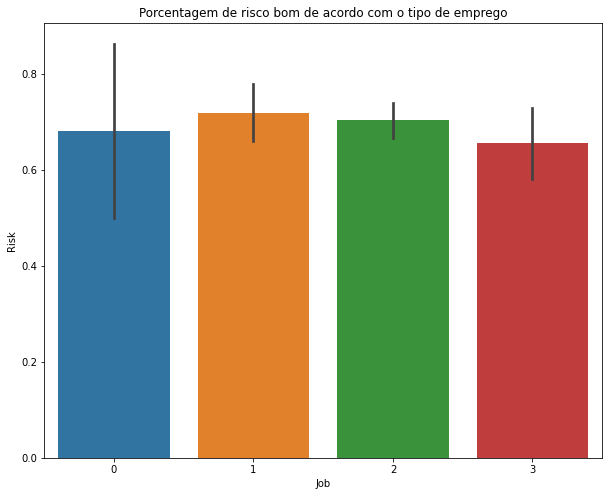

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x=dados["Job"],y=dados["Risk"]).set_title("Porcentagem de risco bom de acordo com o tipo de emprego")

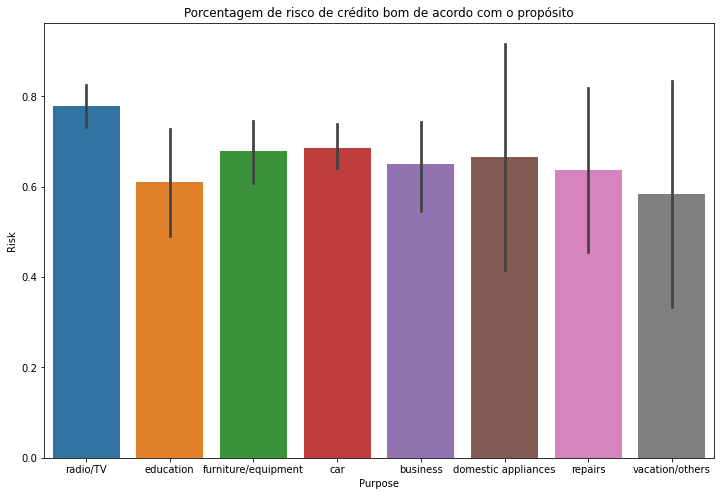

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x=dados["Purpose"],y=dados["Risk"])
plt.title("Porcentagem de risco de crédito bom de acordo com o propósito")
plt.show()

Ao verificar o gráfico relacionado ao Job(emprego), pode-se notar que a taxa de risco bom é semelhante para os 4 tipos de job . Já analisando o gráfico de risco dado por propósito ,é possivel observar que a resposta que possui a maior porcentagem de risco bom é quando a resposta é radio/Tv , já a menor porcentagem de risco de crédito bom é "Vacation/Others" relacionada a pedir empréstimo para sair de férias . 


# Construção dos modelos de machine learning 


Por fim,após a análise exploratória,é possivel construir os modelos Machine Learning para classificar o risco de crédito . Após a construção dos algoritmos para prever o risco, será utilizada a técnica da validação cruzada para se calcular a média da acurácia do algoritimo,onde será utilizda um cv de 5 . 

In [49]:
#Construção de listas para armazenar as acurácias dos modelos e a lista dos algortimos 
listaalgoritmos=[]
listaacuracia=[]

In [50]:
x=dados.iloc[:,0:9].values
y=dados.iloc[:,9].values 


In [51]:
labelencoder=LabelEncoder()
#Codificando s variáveis qualitativas com números 
#Sexo = 1 se masculino,0 se feminino
#Housing=1 se própria ,0 se free ,2 se aluguel
#Saving account =0 se little,1 se moderate,2 se quite rich ,3 se rich 
#Checking account = 1 se little,2 se moderate,0 se não informado,3 se rich 
#Purpose= 5 se Radio/Tv,3 se Education,4 se furniture/equipment,1 se car,0 se business 
x[:,1]=labelencoder.fit_transform(x[:,1])
x[:,3]=labelencoder.fit_transform(x[:,3])
x[:,4]=labelencoder.fit_transform(x[:,4])
x[:,5]=labelencoder.fit_transform(x[:,5])
x[:,8]=labelencoder.fit_transform(x[:,8])
x

array([[67, 1, 2, ..., 1169, 6, 5],
       [22, 0, 2, ..., 5951, 48, 5],
       [49, 1, 1, ..., 2096, 12, 3],
       ...,
       [38, 1, 2, ..., 804, 12, 5],
       [23, 1, 2, ..., 1845, 45, 5],
       [27, 1, 2, ..., 4576, 45, 1]], dtype=object)

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

In [53]:
column_transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [1,2,3,4,5,8])],remainder='passthrough')

In [54]:
x=column_transformer.fit_transform(x)

In [55]:
#Construção do modelo Naive Bayes 
from sklearn.naive_bayes import GaussianNB
modelonaive=GaussianNB()
acuracia=cross_val_score(modelonaive,x,y,cv=5,scoring="accuracy")
listaacuracia.append(acuracia.mean())
listaalgoritmos.append("Naive Bayes")

In [56]:
#Construção do modelo de Regressão Logistica
from sklearn.linear_model import LogisticRegression

In [57]:
modeloregressao=LogisticRegression(solver="lbfgs",max_iter=1000)


In [58]:
acuracia=cross_val_score(modeloregressao,x,y,cv=5,scoring="accuracy")
listaacuracia.append(acuracia.mean())
listaalgoritmos.append("Regressão Logistica")

In [59]:
#Construção do modelo Random Forest 
from sklearn.ensemble import RandomForestClassifier 

In [60]:
modelorandomforest=RandomForestClassifier(n_estimators=40,criterion="entropy")

In [61]:
acuracia=cross_val_score(modelorandomforest,x,y,cv=5,scoring="accuracy")
listaacuracia.append(acuracia.mean())
listaalgoritmos.append("Random Forest")

In [62]:
#Construção do modelo Árvore de Decisão 
from sklearn.tree import DecisionTreeClassifier

In [63]:
modeloarvore=DecisionTreeClassifier(criterion="entropy")

In [64]:
acuracia=cross_val_score(modeloarvore,x,y,cv=5,scoring="accuracy")
listaacuracia.append(acuracia.mean())
listaalgoritmos.append("Árvore de Decisão")

In [65]:
#Construção do modelo SVM
from sklearn.svm import SVC

In [66]:
modelosvm=SVC(kernel="linear")
listaacuracia.append(acuracia.mean())
listaalgoritmos.append("SVM")

In [67]:
#Construção do modelo KNN
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler

In [68]:
#Padronizando as variáveis
standardscaler=StandardScaler()
xcopia=x.copy()
xcopia=standardscaler.fit_transform(xcopia)

In [69]:
modeloknn=KNeighborsClassifier(n_neighbors=60)
acuracia=cross_val_score(modeloknn,xcopia,y,cv=5,scoring="accuracy")
listaacuracia.append(acuracia.mean())
listaalgoritmos.append("KNN")

In [70]:
dadosresultados=pd.DataFrame()
dadosresultados["Algoritmo"]=listaalgoritmos
dadosresultados["Acurácia"]=listaacuracia


Então,pode-se conhecer a acurácia média dos algoritmos por meio de uma tabela .

In [71]:
dadosresultados=dadosresultados.sort_values(by="Acurácia",ascending=False)
dadosresultados

,Algoritmo,Acurácia
1,Regressão Logistica,0.737
2,Random Forest,0.730
5,KNN,0.711
0,Naive Bayes,0.688
3,Árvore de Decisão,0.677
4,SVM,0.677


Ao se observar a tabela pode-se verificar que o algoritmo que teve uma melhor acurácia média para classificar se um pessoa tem um bom ou mau risco de crédito foi Regressão Logistica ,e o menor SVM  .   

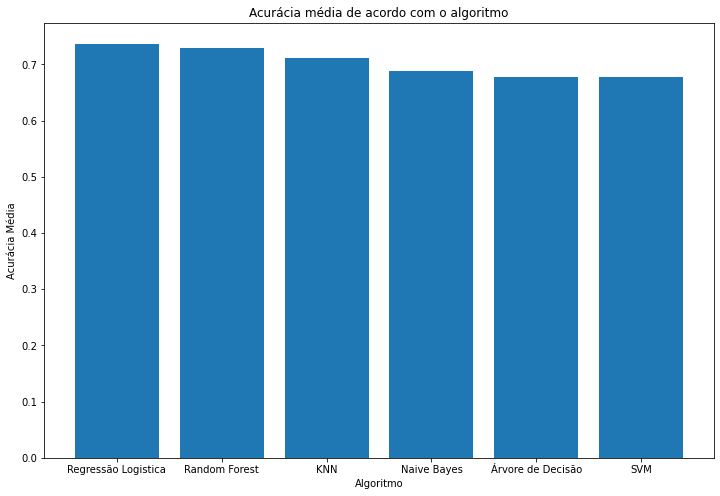

In [72]:
plt.figure(figsize=(12,8))
plt.bar(dadosresultados["Algoritmo"],dadosresultados["Acurácia"])
plt.xlabel("Algoritmo")
plt.ylabel("Acurácia Média")
plt.title("Acurácia média de acordo com o algoritmo")
plt.show()

O algoritmo que apresentou o melhor resultado foi Regressão Logistica ,enquanto o que apresentou o segundo melhor resultado foi KNN . Porém,não pode-se definir qual dos foi melhor levando-se em consideração apenas a acurácia ,deve-se levar em consideração outras métricas de avaliação de algoritmos de classificação . Então , é construido agora duas matrizes para verificar qual possui o melhor resultado levando-se em consideração outras métricas de avaliação . 

In [73]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [74]:
#Divide os dados em treino e teste,sendo 30% dos dados para teste
x_treino,x_teste,y_treino,y_teste=train_test_split(x,y,test_size=0.3,random_state=1)

A matriz de métricas do algoritmo de Regressão Logistica é dada por :

In [75]:
modeloregressaologistica=LogisticRegression(solver="lbfgs",max_iter=1000)
modeloregressaologistica.fit(x_treino,y_treino)
resultadoregressao=modeloregressaologistica.predict(x_teste)
print(classification_report(y_teste,resultadoregressao))

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        86
           1       0.77      0.85      0.81       214

    accuracy                           0.71       300
   macro avg       0.64      0.61      0.62       300
weighted avg       0.70      0.71      0.70       300



A matriz de métricas do algoritmo de Random Forest é dada por :

In [76]:
modelorandomforest=RandomForestClassifier(n_estimators=40,criterion="entropy")
modelorandomforest.fit(x_treino,y_treino)
resultadorandomforest=modelorandomforest.predict(x_teste)
print(classification_report(y_teste,resultadorandomforest))

              precision    recall  f1-score   support

           0       0.54      0.43      0.48        86
           1       0.79      0.86      0.82       214

    accuracy                           0.73       300
   macro avg       0.67      0.64      0.65       300
weighted avg       0.72      0.73      0.72       300



As duas principais métricas dessa matriz que podem ser utilizadas, além da acurácia,são Precisão e Recall . A métrica escolhida será a precisão ,pois acredita-se que para uma instituição seja mais prejudicial um falso positivo do que um falso negativo,pois dessa forma a instituição não irá perder dinheiro . Ao observar a precisão da matriz de Regressão Logistica ,pode-se observar que a Precisão é de 0.77,que é levemente menor do que  a precisão de 0.79 da matriz do algoritmo Random Fores,logo os dois algoritmos praticamente empatam nesse critério . 

Portanto,após estas análises ,pode-se observar que o melhor algoritmo para classificar um risco de crédito é a Regressão Logistica,porém sendo diferença para o de Random Forest de apenas 0.01,o que torna a perfomance dos dois algoritmos praticamente iguais . 